# Вариант 3
## Практическое задание 5


###  Часть 1
Загрузите в Питоне данные, соответствующие вашему варианту. Возможно, будет
удобнее воспользоваться библиотекой pandas, в частности функцией read_csv. Некоторые записи в данных могут иметь неправильный формат, поэтому сначала файл с
данными придется преобразовать. В процессе преобразовании можно проигнорировать не более 1% строк, в которых указана дата (если будете удалять, напечатайте
долю удаленных строк). Строки, в которых дата не указана, нужно удалить.

Имеем дело со строками вида:

202.32.92.47 - - [01/Jun/1995:00:00:59 -0600] "GET /~scottp/publish.html" 200 271

[Thu Jun  1 09:23:39 1995] httpd: send aborted for 202.32.92.47

In [307]:
import scipy as sc
from datetime import datetime
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

In [312]:
DataFrameAccessed = pd.read_csv('./usask_access_log',delimiter=None,sep='- -',
                                engine='python',)
DataFrameAborted = pd.read_csv("./UofS_abort_log", delimiter=None, sep='httpd: send aborted for', 
                               engine='python')
DataFrameAborted.columns = ('string', 'adresses')
DataFrameAccessed.columns = ('adresses', 'string')
df = DataFrameAborted+DataFrameAccessed

In [344]:
df.head(10)

,string,adresses,timestamp,Restring,shiftedStamps
0,[Thu Jun 1 08:52:12 1995],yak-ts1-p19.wolfe.net,801982332,1/Jun/1995:08:52:12,0
1,[Thu Jun 1 09:23:39 1995],UNKNOWN_HOST,801984219,1/Jun/1995:09:23:39,1887
2,[Thu Jun 1 09:24:32 1995],edu219.usask.ca,801984272,1/Jun/1995:09:24:32,1940
3,[Thu Jun 1 09:24:43 1995],edu219.usask.ca,801984283,1/Jun/1995:09:24:43,1951
4,[Thu Jun 1 09:41:32 1995],146.229.17.105,801985292,1/Jun/1995:09:41:32,2960
5,[Thu Jun 1 09:41:32 1995],146.229.17.105,801985292,1/Jun/1995:09:41:32,2960
6,[Thu Jun 1 09:41:34 1995],146.229.17.105,801985294,1/Jun/1995:09:41:34,2962
7,[Thu Jun 1 09:41:34 1995],146.229.17.105,801985294,1/Jun/1995:09:41:34,2962
8,[Thu Jun 1 09:42:17 1995],146.229.17.105,801985337,1/Jun/1995:09:42:17,3005
9,[Thu Jun 1 09:42:17 1995],146.229.17.105,801985337,1/Jun/1995:09:42:17,3005


### Часть 2
Переведите дату в timestamp-число с помощью библиотеки datetime. Например, дата
24/Oct/1994:13:41:41 преобразуется в число 782995301 с помощью кода
from datetime import datetime
datetime.strptime("24/Oct/1994:13:41:41", "%d/%b/%Y:%H:%M:%S").timestamp()
Подробнее читайте в документациях к библиотекам datetime и time.

In [345]:
def StringParser(string):
    if "- -" in string:
        i = 0
        while not(string[i] is  '['):
            i = i +1
        j = i
        while not(string[j] is ' '):
            j = j+1
        Restring = string[i+1:j]
        timestamp = int(datetime.strptime(str(Restring), "%d/%b/%Y:%H:%M:%S").timestamp())
        return timestamp, Restring
    else:
        try:
            string = string[5:len(string)-1]
            Month = string[0:3]
            Day = string[4:6]
            Hour = string[7:9]
            Minute = string[10:12]
            Second = string[13:15]
            Year = string[16:-1]
            Restring = Day+'/'+Month+"/"+Year+":"+Hour+":"+Minute+":"+Second
            #print(Restring)
            timestamp = int(datetime.strptime(str(Restring), "%d/%b/%Y:%H:%M:%S").timestamp())
            return timestamp, Restring
        except Exception:
            print(Restring, "ошибка представления!\n")
            
            
def StringParserForNum(string):
    try:
        string = string[5:len(string)-1]
        Month = string[0:3]
        Day = string[4:6]
        Hour = string[7:9]
        Minute = string[10:12]
        Second = string[13:15]
        Year = string[16:-1]
        Restring = Day+'/'+Month+"/"+Year+":"+Hour+":"+Minute+":"+Second
        #print(Restring)
        timestamp = int(datetime.strptime(str(Restring), "%d/%b/%Y:%H:%M:%S").timestamp())
        return timestamp
    except Exception:
        print(string, "ошибка представления!\n")

In [340]:

# TS == Time Stamp
df['timestamp'], df['Restring'] = zip(*df['string'].map(StringParser))

In [319]:
Ignore_Coeff = len(df.drop(df.index[df['timestamp'] == False])) / (len(df)+1)
if 1-Ignore_Coeff < 0.01:
    print("Проигнорировано меньше 1 процента.")
else:
    print("Ошибка!")

Проигнорировано меньше 1 процента.


### Часть 3
Запросы, происходящие в некоторые моменты времени, образуют пуассоновский процесс, смысл которого — количество запросов, обработанных сервером к текущему моменту времени. Нарисуйте графики траектории этого пуассоновского процесса за все время и за первые сутки. Нарисуйте так же аналогичные графики составного пуассоновского процесса, взяв в качестве значений количество байт (bytes in the reply).При построении графиков используйте код с семинара.

Отсортируем и вычтем минимальное время, чтобы было удобно строить графики.

In [347]:
df = df.sort_values(by='timestamp')
#del df.Restring
df['shiftedStamps'] = df.timestamp-np.min(df.timestamp)


тут строим для первых записей.

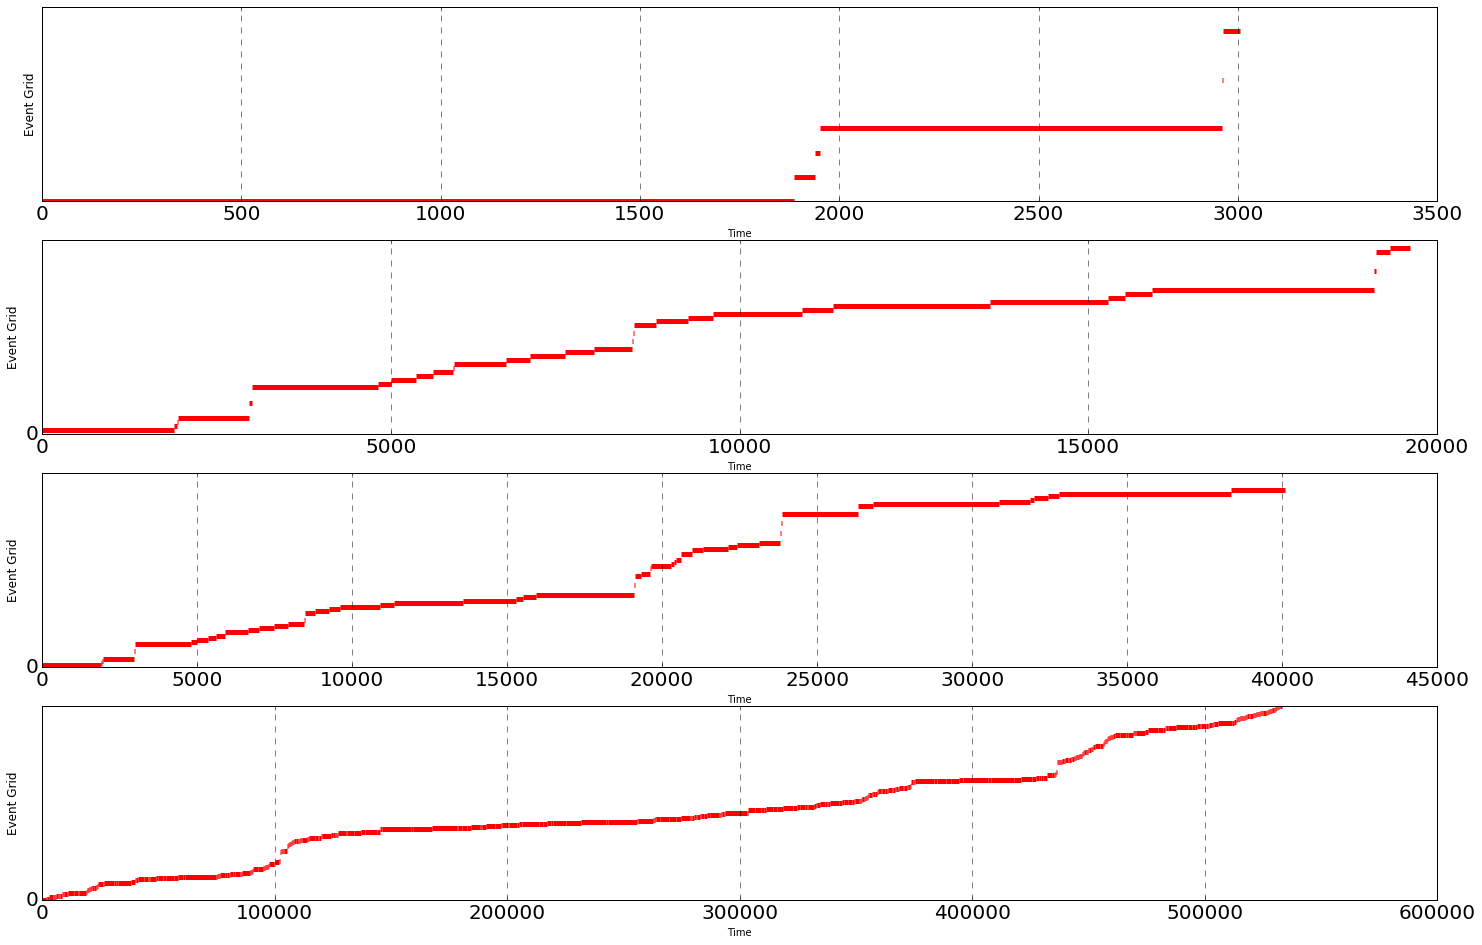

In [339]:
plt.figure(figsize=(25, 16))
for subplt, s in enumerate([10, 50, 100, 1000]):
    a = np.cumsum(np.ones_like(df.shiftedStamps[:s].values))
    plt.subplot(4, 1, subplt + 1)
    cnt = len(df.shiftedStamps[:s].values) - 1
    for i in range(cnt):
        plt.hlines(a[i], df.shiftedStamps[0:s].values[i], 
                   df.shiftedStamps[0:s].values[i+1], 
                   lw=5, color='r')
    plt.grid(ls='--')
    plt.xticks(fontsize=20)
    plt.xlabel('Time',fontsize=10)
    plt.yticks(range(0, np.max(a), int(np.max(a))), fontsize=20)
    plt.ylabel('Event Grid', fontsize=12)
plt.show()

Теперь построим аналогичные графики для первых суток

In [215]:
a = datetime.strptime("01/Jun/1995:08:52:12", "%d/%b/%Y:%H:%M:%S").timestamp()
b = datetime.strptime("02/Jun/1995:08:45:37", "%d/%b/%Y:%H:%M:%S").timestamp()
c = b - a
print(c)

86005.0


In [341]:
df.head(3)

,string,adresses,timestamp,Restring,shiftedStamps
0,[Thu Jun 1 08:52:12 1995],yak-ts1-p19.wolfe.net,801982332,1/Jun/1995:08:52:12,0
1,[Thu Jun 1 09:23:39 1995],UNKNOWN_HOST,801984219,1/Jun/1995:09:23:39,1887
2,[Thu Jun 1 09:24:32 1995],edu219.usask.ca,801984272,1/Jun/1995:09:24:32,1940


### Часть 4
Проверьте полученный пуассоновский процесс на однородность за все время, а так
же за некоторые другие интервалы времени (месяц, неделя, сутки, час). Имеются ли
интервалы, на которых процесс однороден? Чтобы проверить корректность работы
реализованных критериев, можно проверить их на сгенерированных данных. Код для
генерации можно взять с семинара.

In [255]:
def f(shifts, n_basket):
    min_shift, max_shift = np.min(shifts), np.max(shifts) + 1
#     print(min_shift, max_shift)
    partition = [min_shift + i * int((max_shift - min_shift) / n_basket) for i in range(n_basket)]
    partition.append(max_shift)
#     print(partition)
    baskets = list(map(lambda i: np.sum((partition[i - 1] <= shifts) * (shifts < partition[i])), 
                       range(1, len(partition))))
    return baskets
def chi_square(shifts, n_basket):
    n_basket = min(n_basket, len(shifts) // 5)
    f_obs = f(shifts, n_basket)
    f_exp = np.ones(n_basket) * len(shifts) / n_basket
    return sps.chisquare(f_obs, f_exp)


Проверим однородность как гипотезу при помощи критерия хи-квадрат (код взят с разлинчых семинаров)

In [342]:
kriteria = chi_square(df.shiftedStamps.values, 424242)
print(kriteria)

Power_divergenceResult(statistic=113131.87315246002, pvalue=0.0)


Так как получили, что p-value=0.0, то гипотеза об однородности отвергнута. 
Для недель и дня однородности точно не будет, так как днем многие люди не просто заходят в интернет, но и работают, учатся. Аналогично с неделями. С часами скорее всего наблюдать однородность будет реальнее, так как амплитуда проявляется меньше. 

### Часть 5
Постройте оценку функции интенсивности следующим образом. Разбейте весь временной интервал на небольшие равные по длине интервалы с достаточным количеством событий в каждом интервале (например, интерваля длинною в час). На каждом
интервале оцените значение интенсивности процесса, считая его однородным на дан-
ном интервале. В какие моменты времени наблюдается наибольшая интенсивность?


ОМП интен-и однородного пуассоновского процесса на интервале $[a, b]$:
    $$\theta^* = \overline{X}$$